In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

**1 The Bootstrap and The Normal Curve**

In [2]:
pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop('Facility ID','Process Description')
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


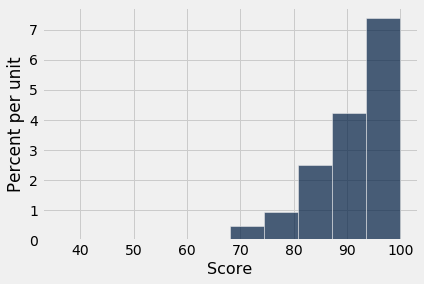

In [3]:
pop_restaurants.hist('Score')

In [4]:
pop_mean = np.mean(pop_restaurants.column('Score'))
pop_mean

91.40706693478886

In [5]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
John B. Connally High School-Culinary Kitchen,78753,03/06/2014,97,"13212 N LAMAR BLVD AUSTIN, TX 78753 (30.417194, -97.675876)"
Taqueria Los Jaliscienses,78745,07/27/2015,73,"1815 W BEN WHITE BLVD EB AUSTIN, TX 78745 (30.228946, -9 ..."
Southside Flying Pizza,78702,07/27/2016,80,"2702 E CESAR CHAVEZ ST AUSTIN, TX 78702 (30.253393, -97. ..."
Little Country Diner,78669,01/21/2015,94,"22000 W SH 71 SPICEWOOD, TX 78669 (30.36612, -98.071449)"
Guerrero-Thompson Elementary School,78753,08/23/2016,95,"102 E RUNDBERG LN AUSTIN, TX 78753 (30.360804, -97.693239)"
Zed's Restaurant,78753,01/15/2016,82,"501 CANYON RIDGE DR AUSTIN, TX 78753 (30.403095, -97.672006)"
Family Dollar,78723,08/11/2015,96,"3851 AIRPORT BLVD AUSTIN, TX 78723 (30.289563, -97.707176)"
Randall's #2485,78745,04/17/2015,93,"2025 W BEN WHITE BLVD EB AUSTIN, TX 78745 (30.230214, -9 ..."
La Michoacana Meat Market-Taqueria/bakery,78723,01/21/2015,89,"5706 MANOR RD AUSTIN, TX 78723 (30.304672, -97.681232)"
Bluebonnet Hill Golf,78724,04/07/2016,85,"9100 DECKER LN AUSTIN, TX 78724 (30.317472, -97.61109)"


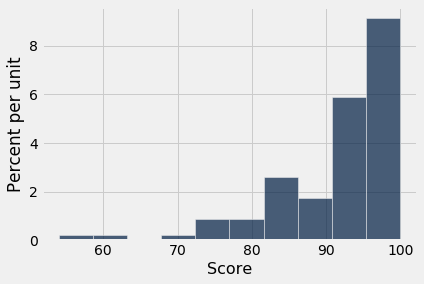

In [6]:
restaurant_sample.hist('Score')

In [7]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_mean

91.86

**1.1 Question 1**
Complete the function one resampled mean below. It should take in an original table data, with a column Score,
and return the mean score of one resampling from data.

89.81

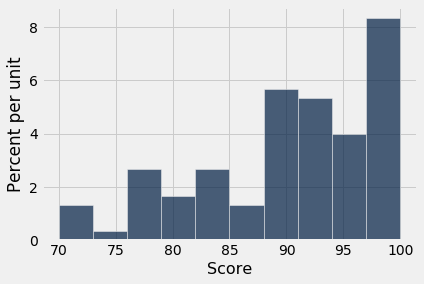

In [8]:
def one_resampled_mean(data):
    resampled_data = pop_restaurants.sample(100, with_replacement=False)
    mean = np.mean(resampled_data.column('Score'))
    resampled_data.hist('Score')
    return mean
this_mean = one_resampled_mean('Score') 
this_mean

**1.2 Question 2**
Complete the function bootstrap scores below. It should take no arguments. It should simulate drawing 5000
resamples from restaurant sample and compute the mean restaurant score in each resample. It should return an
array of those 5000 resample means.

In [9]:
def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        resample = restaurant_sample.sample()
        resampled_mean = np.mean(resample.column('Score'))
        resampled_means = np.append(resampled_means,resampled_mean)
    return resampled_means
resampled_means = bootstrap_scores()
resampled_means

array([89.52, 91.65, 92.58, ..., 91.01, 92.02, 91.83])

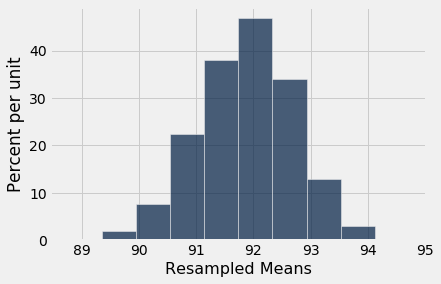

In [10]:
Table().with_column('Resampled Means', resampled_means).hist()

**1.3 Question 3**
Compute a 95 percent conﬁdence interval for the average restaurant score using the array resampled means.

In [11]:
lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 90.18 , 93.44 )


**1.4 Question 4**
What distribution is the histogram between question 2 and 3 displaying (that is, what data are plotted), and why does it have that shape

**Explanation**
The bootstrap distribution is the distribution of means from each resample. 
Our estimates are all the randomly generated sampled means whose histogram you see above.
The empirical histogram is the result of random draws (bootstrapping).

**1.5 Question 5**
Does the distribution of the sampled scores look normally distributed? State “yes” or “no” and describe in one sentence why you should expect this result

**Explanation**
No.
By the law of averages, the distribution of the original sample is likely to resemble the population.
The histogram is positively skewed for sampled scores and not normaly distributed.

**1.6 Question 6**
Without referencing the array resampled means or performing any new simulations, calculate an interval around the sample mean that covers approximately 95% of the numbers in the resampled means array. This conﬁdence interval should look very similar to the one you computed in Question 3

In [12]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_sd = np.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows

sd_of_means = np.std(resampled_means)
lower_bound_normal = sample_mean - 1.96*(sample_sd / np.sqrt(sample_size))
upper_bound_normal = sample_mean + 1.96*(sample_sd / np.sqrt(sample_size))
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 90.20196974502876 , 93.51803025497124 )


**2 Testing the Central Limit Theorem**

**2.1 Question 1**
Deﬁne the function one statistic prop heads which should return exactly one simulated statistic of the proportion of heads from n coin ﬂips.

In [13]:
coin_proportions = make_array(.5, .5) # our coin is fair

def one_statistic_prop_heads(n):
    simulated_proportions = sample_proportions(n, coin_proportions)
    prop_heads = simulated_proportions

    return prop_heads

one_statistic_prop_heads(100)

array([0.55, 0.45])

**2.2 Question 2**
Write a function called sample size n that takes in a sample size n. It should return an array that contains 5000 sample proportions of heads, each from n coin ﬂips.

In [14]:
def sample_size_n(n):
    coin_proportions = make_array(.5, .5) # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        prop_heads = one_statistic_prop_heads(n)
        heads_proportions = np.append(heads_proportions, prop_heads)
    return heads_proportions

sample_size_n(100)

array([0.58, 0.42, 0.46, ..., 0.44, 0.56, 0.44])

In [15]:
# Just run this cell

from ipywidgets import interact

def outer(f):
    def graph(x):
        bins = np.arange(-0.01,1.05,0.02)
        sample_props = f(x)
        Table().with_column('Sample Size: {}'.format(x), sample_props).hist(bins=bins)
        plt.ylim(0, 30)
        print('Sample SD:', np.std(sample_props))
        plt.show()
    return graph
    
interact(outer(sample_size_n), x=(0, 400, 1), continuous_update=False);

# Min sample size is 0, max is 400
# The graph will refresh a few times when you drag the slider around

interactive(children=(IntSlider(value=200, description='x', max=400), Output()), _dom_classes=('widget-interac…

**2.3 Question 3**
Write a function called empirical sample mean sd that takes a sample size n as its argument. The function should simulate 500 samples with replacement of size n from the ﬂight delays dataset, and it should return the standard deviation of the means of those 500 samples.

In [16]:
united = Table.read_table('united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

In [17]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n).column('Delay')
        sample_mean = np.mean(sample)
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(10)

12.090250305101215

**2.4 Question 4**
Now, write a function called predict sample mean sd to ﬁnd the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard deviation of the mean delay time for samples of size n from the ﬂight delays (represented in the table united).

In [18]:
def predict_sample_mean_sd(n):
    delay_std = np.std(united.column('Delay'))
    return delay_std/np.sqrt(n)

predict_sample_mean_sd(10)

12.484735400972708

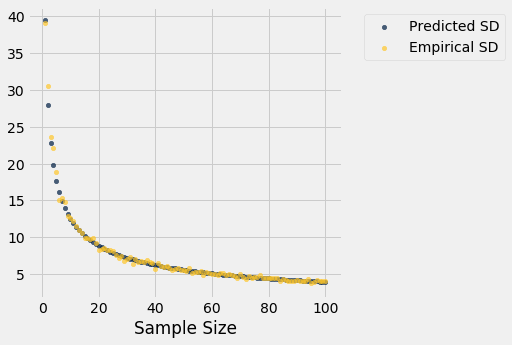

In [19]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sample_mean_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sample_mean_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')